# 기본

In [ ]:
import torch
from torch.autograd import Variable
import torch.optim as optim
import numpy as np

# Function to calculate distance from origin
def calculate_distance(x, y):
    return torch.sqrt(x**2 + y**2)

# Function to calculate loss
def loss_function(r, r_prime):
    return torch.norm(r - r_prime)

# Initialize true and initial coordinates
true_coordinates = np.array([(1, 1), (2, 2), (3, 3), (4, 4)])
initial_coordinates = np.array([(-5, 1), (-2, 2), (2, 3), (4, 6)])

# Convert coordinates to PyTorch variables
true_x, true_y = Variable(torch.tensor(true_coordinates[:, 0], dtype=torch.float32), requires_grad=False), \
                Variable(torch.tensor(true_coordinates[:, 1], dtype=torch.float32), requires_grad=False)

x = Variable(torch.tensor(initial_coordinates[:, 0], dtype=torch.float32), requires_grad=True)
y = Variable(torch.tensor(initial_coordinates[:, 1], dtype=torch.float32), requires_grad=True)

# Calculate true distances and convert to PyTorch variable
r_actual = calculate_distance(true_x, true_y)
r_actual = Variable(r_actual, requires_grad=False)

# Set up the optimizer
optimizer = optim.SGD([x, y], lr=0.01)

# Training loop
for epoch in range(1000):  # You may need to adjust the number of epochs
    optimizer.zero_grad()

    # Compute the current distances
    r = calculate_distance(x, y)

    # Compute the loss
    loss = loss_function(r, r_actual)

    # Backpropagation
    loss.backward()

    # Update coordinates
    optimizer.step()

    # Print loss for monitoring
    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

# Print final coordinates
final_x, final_y = x.data.numpy(), y.data.numpy()
print(f'Final Coordinates: x = {final_x}, y = {final_y}')


Epoch 0, Loss: 4.049612998962402
Epoch 100, Loss: 3.049604654312134
Epoch 200, Loss: 2.0496137142181396
Epoch 300, Loss: 1.0496243238449097
Epoch 400, Loss: 0.049627240747213364
Epoch 500, Loss: 0.009627847000956535
Epoch 600, Loss: 0.009627891704440117
Epoch 700, Loss: 0.009627891704440117
Epoch 800, Loss: 0.009627891704440117
Epoch 900, Loss: 0.009627891704440117
Final Coordinates: x = [-1.3953507 -2.         2.3525417  3.1398787], y = [0.2790668 2.        3.5288491 4.709859 ]


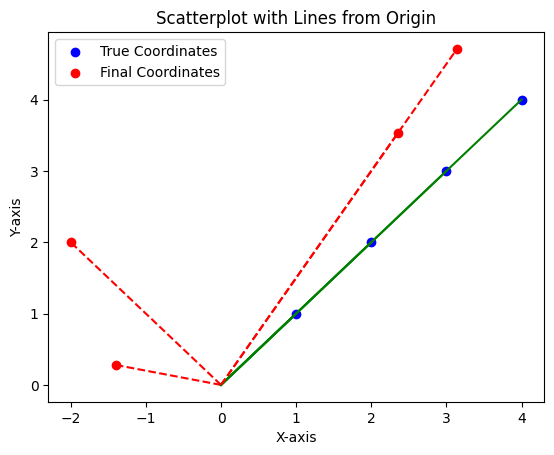

In [ ]:
# Plot the scatterplot and draw lines from the origin
plt.scatter(true_coordinates[:, 0], true_coordinates[:, 1], label='True Coordinates', color='blue')
plt.scatter(final_x, final_y, label='Final Coordinates', color='red')

# Draw lines from the origin to each point for both sets of coordinates
for i in range(len(final_x)):
    plt.plot([0, true_coordinates[i, 0]], [0, true_coordinates[i, 1]], linestyle='-', color='green')
    plt.plot([0, final_x[i]], [0, final_y[i]], linestyle='--', color='red')

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatterplot with Lines from Origin')
plt.legend()
plt.show()

In [ ]:
import torch
from torch.autograd import Variable
import torch.optim as optim
import numpy as np

# Function to calculate distance from two sensors
def calculate_distance(x, y, sensor_x, sensor_y):
    distance_sensor1 = torch.sqrt((x - sensor_x[0])**2 + (y - sensor_y[0])**2)
    distance_sensor2 = torch.sqrt((x - sensor_x[1])**2 + (y - sensor_y[1])**2)
    return distance_sensor1, distance_sensor2

# Function to calculate loss
def loss_function(r1, r2, r1_prime, r2_prime):
    return torch.norm(r1 - r1_prime) + torch.norm(r2 - r2_prime)

# Initialize true and initial coordinates
true_coordinates = np.array([(1, 1), (2, 2), (3, 3), (4, 4)])
initial_coordinates = np.array([(-5, 1), (-2, 2), (2, 3), (4, 6)])

# Sensor coordinates
sensor_coordinates = np.array([(0, 0), (2, 0)])  # Update with actual sensor coordinates

# Convert coordinates to PyTorch variables
true_x, true_y = Variable(torch.tensor(true_coordinates[:, 0], dtype=torch.float32), requires_grad=False), \
                Variable(torch.tensor(true_coordinates[:, 1], dtype=torch.float32), requires_grad=False)

x = Variable(torch.tensor(initial_coordinates[:, 0], dtype=torch.float32), requires_grad=True)
y = Variable(torch.tensor(initial_coordinates[:, 1], dtype=torch.float32), requires_grad=True)

# Sensor coordinates as PyTorch variables
sensor_x, sensor_y = Variable(torch.tensor(sensor_coordinates[:, 0], dtype=torch.float32), requires_grad=False), \
                     Variable(torch.tensor(sensor_coordinates[:, 1], dtype=torch.float32), requires_grad=False)

# Set up the optimizer
optimizer = optim.SGD([x, y], lr=0.01)

# Training loop
for epoch in range(10000):  # You may need to adjust the number of epochs
    optimizer.zero_grad()

    # Compute the current distances
    r1, r2 = calculate_distance(x, y, sensor_x, sensor_y)

    # Compute the true distances
    r1_actual, r2_actual = calculate_distance(true_x, true_y, sensor_x, sensor_y)

    # Compute the loss
    loss = loss_function(r1, r2, r1_actual, r2_actual)

    # Backpropagation
    loss.backward()

    # Update coordinates
    optimizer.step()

    # Print loss for monitoring
    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

# Print final coordinates
final_x, final_y = x.data.numpy(), y.data.numpy()
print(f'Final Coordinates: x = {final_x}, y = {final_y}')


Epoch 0, Loss: 10.497034072875977
Epoch 100, Loss: 6.782777786254883
Epoch 200, Loss: 3.726823329925537
Epoch 300, Loss: 3.0071394443511963
Epoch 400, Loss: 2.8595402240753174
Epoch 500, Loss: 2.674083709716797
Epoch 600, Loss: 2.4311609268188477
Epoch 700, Loss: 2.126455307006836
Epoch 800, Loss: 1.7152389287948608
Epoch 900, Loss: 1.1963474750518799
Epoch 1000, Loss: 0.6642045378684998
Epoch 1100, Loss: 0.24661917984485626
Epoch 1200, Loss: 0.0663871318101883
Epoch 1300, Loss: 0.019081514328718185
Epoch 1400, Loss: 0.01995820924639702
Epoch 1500, Loss: 0.01984788477420807
Epoch 1600, Loss: 0.01964283362030983
Epoch 1700, Loss: 0.019431116059422493
Epoch 1800, Loss: 0.019223690032958984
Epoch 1900, Loss: 0.019019603729248047
Epoch 2000, Loss: 0.01880502700805664
Epoch 2100, Loss: 0.018599987030029297
Epoch 2200, Loss: 0.018395423889160156
Epoch 2300, Loss: 0.018181800842285156
Epoch 2400, Loss: 0.017977237701416016
Epoch 2500, Loss: 0.017772674560546875
Epoch 2600, Loss: 0.01755857467

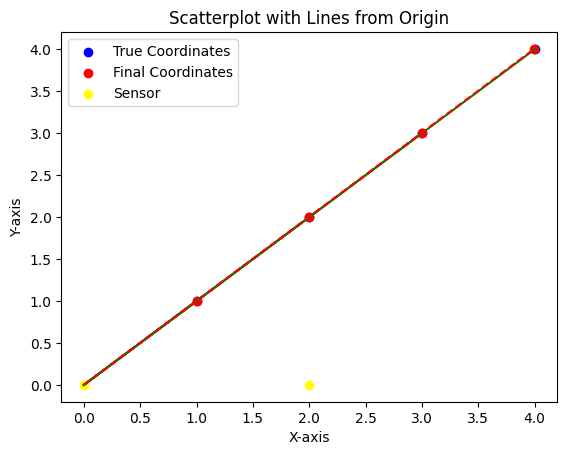

In [ ]:
# Plot the scatterplot and draw lines from the origin
plt.scatter(true_coordinates[:, 0], true_coordinates[:, 1], label='True Coordinates', color='blue')
plt.scatter(final_x, final_y, label='Final Coordinates', color='red')
plt.scatter(sensor_coordinates[:,0],sensor_coordinates[:,1], label = 'Sensor',color = 'yellow')

# Draw lines from the origin to each point for both sets of coordinates
for i in range(len(final_x)):
    plt.plot([0, true_coordinates[i, 0]], [0, true_coordinates[i, 1]], linestyle='-', color='green')
    plt.plot([0, final_x[i]], [0, final_y[i]], linestyle='--', color='red')

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatterplot with Lines from Origin')
plt.legend()
plt.show()

# 삼각형 대형 형성을 위한 학습 데이터 생성

In [1]:
# simulation data
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate the Euclidean distance between two points
def euclidean_distance(p1, p2):
    return np.linalg.norm(p1 - p2)

# Function to calculate the distance matrix between all pairs of nodes
def calculate_distance_matrix(nodes):
    num_nodes = len(nodes)
    distance_matrix = np.zeros((num_nodes, num_nodes))

    for i in range(num_nodes):
        for j in range(i+1, num_nodes):
            distance_matrix[i, j] = euclidean_distance(nodes[i], nodes[j])
            distance_matrix[j, i] = distance_matrix[i, j]

    return distance_matrix

# Function to generate data for training the SOM with a triangular formation
def generate_triangle_data(num_points):
    angle60 = np.radians(60)
    # Define the vertices of an equilateral triangle
    vertices = np.array([[0, 0], [np.cos(0), np.sin(0)], [np.cos(angle60), np.sin(angle60)]])
    data = []

    for _ in range(num_points):
        # Randomly select one of the vertices
        vertex = vertices[np.random.choice(3)]
        # Add some noise to simulate real-world conditions
        noise = np.random.normal(0, 0.1, size=(2,))
        point = vertex + noise
        # Cap x and y coordinates at 1 if they exceed 1
        # Cap x and y coordinates at 0 if they go below 0
        point[0] = min(point[0], 1)
        point[0] = max(point[0], 0)
        point[1] = min(point[1], 1)
        point[1] = max(point[1], 0)        
        data.append(point)
    distance_matrix = calculate_distance_matrix(data)

    return np.array(data),distance_matrix

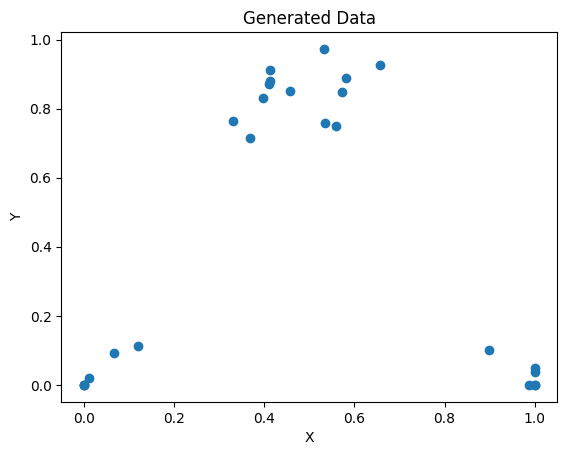

In [2]:
# Generate training data with a triangular formation and distance matrix
data, distance_matrix = generate_triangle_data(25)

# Plot the generated data
plt.scatter(data[:, 0], data[:, 1])
plt.title('Generated Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [3]:
np.max(distance_matrix)

1.136172277952245

# Centralized Localization based on the classical som

1. Choose: $alpha_{max} = 0.1$ and $alpha_{min} = 0.01$ to be the maximum and minimum values of the learning rate, respectively. 
2. Choose $r_{max}$ = max_{i,j}H_{c}(i, j) / 2 and rmin = 0.001 to be the maximum and minimum radius of the neighborhood function, respectively. 

3. 
```python
for all nodes j do 
     (x(j),y(j)) = random () 

   end for  % generate uniformly distributed random 
            % positions between [0,1] 
```
// Main loop 
4. 
```python
for t = 1:N_iter-1 do 
    % N_iter is the number of iterations desired 
    $alpha_(t) = alpha_max - t*(alpha_max-alpha_min)/(N_iter-1);$ 
    $r(t) = rmax - t*(rmax-rmin)/(N_iter-1);$ 
    % linearly decrease values 
    (x,y) = random() 
    $BMU = arg{min_{j} || (x, y) - (x_{j} , y_{j} )}||$
    % BMU is index of best matching unit 
    for all nodes j do 
        $h = exp{\frac{H_{c}(BMU, j)}{2r(t)}}$

        $[x(j), y(j)] = [x(j), y(j)] + α(t)h[(x, y) − (x(j), y(j))]$
    % updates new node position
    end for
end for
```

In [19]:
import numpy as np

# 1. learning rate
alpha_max = 0.1
alpha_min = 0.01

# 2. maximum and minimum radius of the neighborhood function
r_max = np.max(distance_matrix)/2
r_min = 0.001

# 3. for all nodes j do
# Number of nodes
num_nodes = 25  # 예시로 25개의 노드를 생성하는 경우

# Initialize an array to store node coordinates
node_coordinates = np.random.rand(num_nodes, 2)

# MAIN LOOP
N_iter = 8000
for t in range(1,N_iter-1):
    # 4. Linearly Decrease Values
    alpha_t = alpha_max - t * (alpha_max - alpha_min)/(N_iter-1)
    r_t = r_max - t * (r_max - r_min)/ (N_iter-1)
    # Randomly Generate (x,y)
    x = np.random.rand()
    y = np.random.rand()
    # BMU 
    bmu_index = np.argmin(np.linalg.norm(node_coordinates - np.array([x,y]), axis=1))
    # For all nodes j do
    for j in range(num_nodes):
        # Calculate h
        h = np.exp(-(distance_matrix[bmu_index, j]**2)/(2*r_t))
        # 6. Update node positions
        node_coordinates[j] = node_coordinates[j] + alpha_t * h * (np.array([x, y]) - node_coordinates[j])

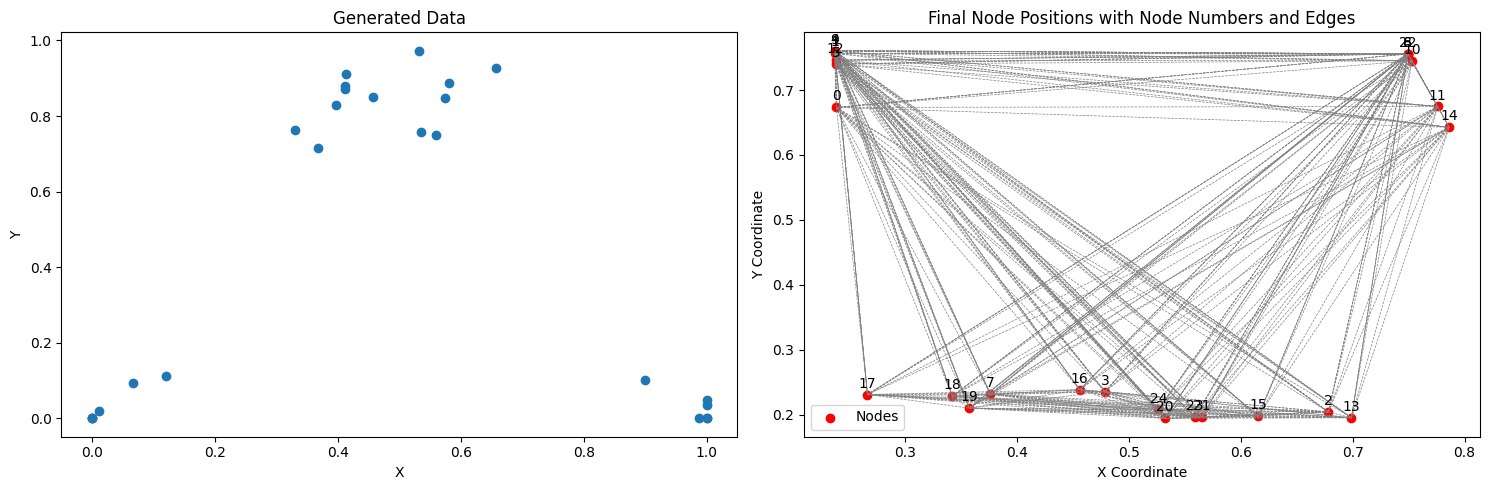

In [20]:
import matplotlib.pyplot as plt

# Plot the original triangular formation and the learned SOM positions
plt.figure(figsize=(15, 5))

# Plot the original triangular formation
plt.subplot(1, 2, 1)
plt.scatter(data[:, 0], data[:, 1])
plt.title('Generated Data')
plt.xlabel('X')
plt.ylabel('Y')

# Plot the learned SOM positions with node numbers and edges
plt.subplot(1, 2, 2)
plt.scatter(node_coordinates[:, 0], node_coordinates[:, 1], c='red', marker='o', label='Nodes')

# Annotate each node with its index
for i, (x, y) in enumerate(node_coordinates):
    plt.annotate(str(i), (x, y), textcoords="offset points", xytext=(0, 5), ha='center')

# Plot edges between nodes
for i in range(num_nodes):
    for j in range(i+1, num_nodes):
        plt.plot([node_coordinates[i, 0], node_coordinates[j, 0]],
                 [node_coordinates[i, 1], node_coordinates[j, 1]], color='gray', linestyle='--', linewidth=0.5)

plt.title('Final Node Positions with Node Numbers and Edges')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend()
plt.tight_layout()
plt.show()

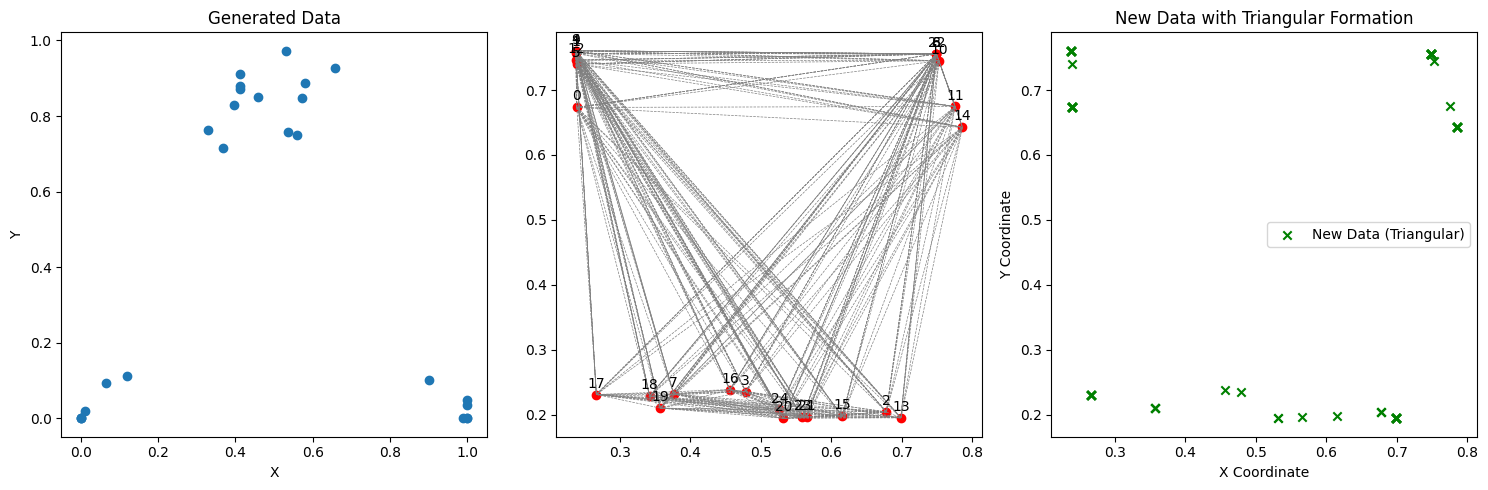

In [22]:
# Function to generate triangular formation using learned SOM
def generate_triangle_from_som(som, num_points):
    # Generate random coordinates
    random_coordinates = np.random.rand(num_points, 2)
    
    # Find the best-matching unit (BMU) for each random coordinate
    bmu_indices = np.argmin(np.linalg.norm(som - random_coordinates[:, np.newaxis, :], axis=2), axis=1)
    
    # Use the BMU coordinates as the generated triangular formation
    generated_triangle = som[bmu_indices]
    
    return generated_triangle

# Generate triangular formation using learned SOM for new data
new_data_triangular = generate_triangle_from_som(node_coordinates, 100)

# Plot the original triangular formation, the learned SOM positions, and the new data with triangular formation
plt.figure(figsize=(15, 5))

# Plot the original triangular formation
plt.subplot(1, 3, 1)
plt.scatter(data[:, 0], data[:, 1])
plt.title('Generated Data')
plt.xlabel('X')
plt.ylabel('Y')

# Plot the learned SOM positions with node numbers and edges
plt.subplot(1, 3, 2)
plt.scatter(node_coordinates[:, 0], node_coordinates[:, 1], c='red', marker='o', label='Nodes')

# Annotate each node with its index
for i, (x, y) in enumerate(node_coordinates):
    plt.annotate(str(i), (x, y), textcoords="offset points", xytext=(0, 5), ha='center')

# Plot edges between nodes
for i in range(num_nodes):
    for j in range(i+1, num_nodes):
        plt.plot([node_coordinates[i, 0], node_coordinates[j, 0]],
                 [node_coordinates[i, 1], node_coordinates[j, 1]], color='gray', linestyle='--', linewidth=0.5)

# Plot the new data with triangular formation
plt.subplot(1, 3, 3)
plt.scatter(new_data_triangular[:, 0], new_data_triangular[:, 1], c='green', marker='x', label='New Data (Triangular)')
plt.title('New Data with Triangular Formation')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend()

plt.tight_layout()
plt.show()



새 데이터는 SOM을 통해 잘 적용될 수 있음. 단, SOM의 형태를 따라갔으므로 SOM이 원본 데이터를 잘 tracking 해야함.

왜 relative 한 관계는 잘 학습했지만, 그 방향이 반대일까? 

--> 논문에서는 initial weight point와 iteration의 중요성에 대해서 언급함. 

# Linear, y = x의 경우

In [18]:
# simulation data
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate the Euclidean distance between two points
def euclidean_distance(p1, p2):
    return np.linalg.norm(p1 - p2)

# Function to calculate the distance matrix between all pairs of nodes
def calculate_distance_matrix(nodes):
    num_nodes = len(nodes)
    distance_matrix = np.zeros((num_nodes, num_nodes))

    for i in range(num_nodes):
        for j in range(i+1, num_nodes):
            distance_matrix[i, j] = euclidean_distance(nodes[i], nodes[j])
            distance_matrix[j, i] = distance_matrix[i, j]

    return distance_matrix

# Function to generate data for training the SOM
def generate_linear_data(num_points):
    # Define the vertices of an equilateral triangle
    vertices = np.array([[0, 0], [0.25, 0.25], [0.5, 0.5],[0.75, 0.75], [1.0, 1.0]])
    data = []

    for _ in range(num_points):
        # Randomly select one of the vertices
        vertex = vertices[np.random.choice(5)]
        # Add some noise to simulate real-world conditions
        noise = np.random.normal(0, 0.1, size=(2,))
        point = vertex + noise       
        data.append(point)
    distance_matrix = calculate_distance_matrix(data)

    return np.array(data),distance_matrix

In [26]:
data, distance_matrix = generate_linear_data(50)

In [27]:
distance_matrix.max()

1.6355313753671714

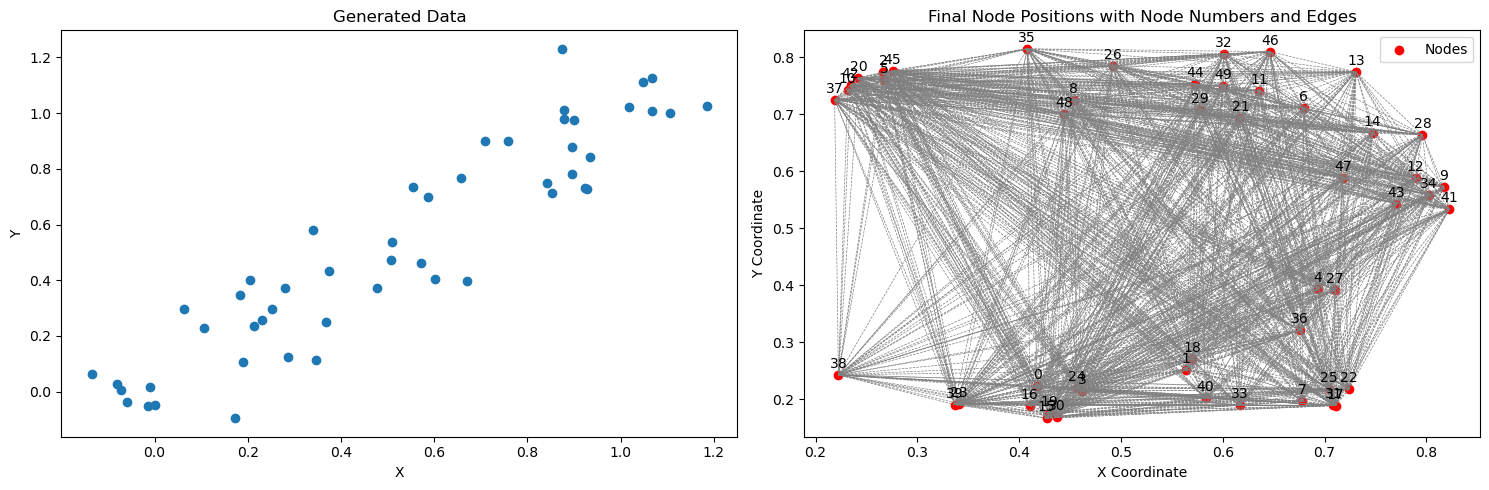

In [28]:
import numpy as np

# 1. learning rate
alpha_max = 0.1
alpha_min = 0.01

# 2. maximum and minimum radius of the neighborhood function
r_max = np.max(distance_matrix)/2
r_min = 0.001

# 3. for all nodes j do
# Number of nodes
num_nodes = 50  # 예시로 50개의 노드를 생성하는 경우

# Initialize an array to store node coordinates
node_coordinates = np.random.rand(num_nodes, 2)

# MAIN LOOP
N_iter = 10000
for t in range(1, N_iter-1):  # Adjusted the loop range
    # 4. Linearly Decrease Values
    alpha_t = alpha_max - t * (alpha_max - alpha_min) / (N_iter-1)
    r_t = r_max - t * (r_max - r_min) / (N_iter-1)
    # Randomly Generate (x,y)
    x = np.random.rand()
    y = np.random.rand()
    # BMU
    bmu_index = np.argmin(np.linalg.norm(node_coordinates - np.array([x, y]), axis=1))
    # For all nodes j do
    for j in range(num_nodes):
        # Calculate h
        h = np.exp(-(distance_matrix[bmu_index, j]**2) / (2 * r_t))
        # 6. Update node positions
        node_coordinates[j] = node_coordinates[j] + alpha_t * h * (np.array([x, y]) - node_coordinates[j])

# Plot the original triangular formation and the learned SOM positions
plt.figure(figsize=(15, 5))

# Plot the original triangular formation
plt.subplot(1, 2, 1)
plt.scatter(data[:, 0], data[:, 1])
plt.title('Generated Data')
plt.xlabel('X')
plt.ylabel('Y')

# Plot the learned SOM positions with node numbers and edges
plt.subplot(1, 2, 2)
plt.scatter(node_coordinates[:, 0], node_coordinates[:, 1], c='red', marker='o', label='Nodes')

# Annotate each node with its index
for i, (x, y) in enumerate(node_coordinates):
    plt.annotate(str(i), (x, y), textcoords="offset points", xytext=(0, 5), ha='center')

# Plot edges between nodes
for i in range(num_nodes):
    for j in range(i+1, num_nodes):
        plt.plot([node_coordinates[i, 0], node_coordinates[j, 0]],
                 [node_coordinates[i, 1], node_coordinates[j, 1]], color='gray', linestyle='--', linewidth=0.5)

plt.title('Final Node Positions with Node Numbers and Edges')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend()
plt.tight_layout()
plt.show()


In [29]:
node_coordinates

array([[0.41777941, 0.22366089],
       [0.5635568 , 0.2521595 ],
       [0.26654627, 0.77420198],
       [0.46194597, 0.21447622],
       [0.69331449, 0.39442958],
       [0.26738579, 0.76033607],
       [0.67949246, 0.71131697],
       [0.67781965, 0.19714337],
       [0.45369989, 0.72470534],
       [0.81745369, 0.57213356],
       [0.2314649 , 0.74261782],
       [0.63590268, 0.74139881],
       [0.78948744, 0.58859563],
       [0.73094532, 0.77440049],
       [0.74740741, 0.66700707],
       [0.42690476, 0.16706319],
       [0.41034474, 0.18919619],
       [0.71103894, 0.18934889],
       [0.56969461, 0.27136994],
       [0.42960165, 0.17655168],
       [0.24210862, 0.76401716],
       [0.61738237, 0.69370518],
       [0.72394912, 0.21781272],
       [0.34092267, 0.19274577],
       [0.45677227, 0.22032508],
       [0.704056  , 0.21819735],
       [0.49207108, 0.78553159],
       [0.71034622, 0.39204862],
       [0.79616327, 0.66410277],
       [0.57769387, 0.70756719],
       [0.